**Stack Overflow Questions with Quality Rating**

# **1. Import library**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 4.4 MB/s 
     |████████████████████████████████| 7.6 MB 19.8 MB/s 
     |████████████████████████████████| 182 kB 15.3 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from bs4 import BeautifulSoup
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.preprocessing.text import Tokenizer
from sklearn.metrics import f1_score,mean_squared_error, r2_score, classification_report, plot_confusion_matrix
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Conv2D, Dense, Dropout, Flatten, AveragePooling2D, MaxPooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objs as go
from wordcloud import WordCloud
import numpy as np
import xgboost as xgb
from tqdm import tqdm
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import LSTM, GRU
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import Embedding
from keras.layers import BatchNormalization
from keras.utils import np_utils
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import keras
import keras.utils
from keras import utils as np_utils
from sklearn.metrics import classification_report,accuracy_score
import nltk
from nltk.corpus import stopwords
import string
import tensorflow
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import itertools 
import tensorflow as tf
import transformers
from transformers import TFAutoModel, AutoTokenizer
from transformers import DistilBertTokenizerFast

# **2. Load data**

https://drive.google.com/drive/folders/1BQMdekfQD9YPZBkYI-ZrInyo7AWo8XB7?usp=sharing

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Dataset_NLP/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Dataset_NLP/valid.csv')
df = pd.concat((train, test))

In [ ]:
df

Id                                              Title  \
0      34552656             Java: Repeat Task Every Random Seconds   
1      34553034                  Why are Java Optionals immutable?   
2      34553174  Text Overlay Image with Darkened Opacity React...   
3      34553318         Why ternary operator in swift is so picky?   
4      34553755                 hide/show fab with scale animation   
...         ...                                                ...   
14995  60465681  How can I align two flex boxes to follow each ...   
14996  60467932  C++ The correct way to multiply an integer and...   
14997  60468378  WHY DJANGO IS SHOWING ME THIS ERROR WHEN I TRY...   
14998  60469392              PHP - getting the content of php page   
14999  60470323  Why can't overloaded functions vary only by re...   

                                                    Body  \
0      <p>I'm already familiar with repeating tasks e...   
1      <p>I'd like to understand why Java 8 Optionals...   
2      <p>I am attempting to overlay a title over an ...   
3      <p>The question is very simple, but I just cou...   
4      <p>I'm using custom floatingactionmenu. I need...   
...                                                  ...   
14995  <p>I have a menu, and I'd like the div.right-c...   
14996  <p>I try to multiply an integer by a double bu...   
14997      *URLS.PY*\r\n    //URLS.PY FILE\r\n    fro...   
14998  <p>I have a controller inside which a server i...   
14999  <p>So i was recently helping someone out with ...   

                                                    Tags         CreationDate  \
0                                         <java><repeat>  2016-01-01 00:21:59   
1                                       <java><optional>  2016-01-01 02:03:20   
2      <javascript><image><overlay><react-native><opa...  2016-01-01 02:48:24   
3      <swift><operators><whitespace><ternary-operato...  2016-01-01 03:30:17   
4      <android><material-design><floating-action-but...  2016-01-01 05:21:48   
...                                                  ...                  ...   
14995                               <html><css><flexbox>  2020-02-29 13:32:56   
14996                                              <c++>  2020-02-29 17:46:41   
14997           <django><django-views><django-templates>  2020-02-29 18:35:39   
14998                            <javascript><php><html>  2020-02-29 20:32:14   
14999                    <c++><overloading><return-type>  2020-02-29 22:45:56   

              Y  
0      LQ_CLOSE  
1            HQ  
2            HQ  
3            HQ  
4            HQ  
...         ...  
14995  LQ_CLOSE  
14996  LQ_CLOSE  
14997   LQ_EDIT  
14998  LQ_CLOSE  
14999  LQ_CLOSE  

[60000 rows x 6 columns]

In [ ]:
df.shape

(60000, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            60000 non-null  int64 
 1   Title         60000 non-null  object
 2   Body          60000 non-null  object
 3   Tags          60000 non-null  object
 4   CreationDate  60000 non-null  object
 5   Y             60000 non-null  object
dtypes: int64(1), object(5)
memory usage: 3.2+ MB


# **3. EDA**

## ***Functions for EDA***

In [ ]:
def extract_feature_len(df, value=''):
  '''Hàm trả về độ dài feature'''
  return df[value].apply(len)

In [ ]:
def get_class_feature(df, cls, feature):
  '''Hàm trả về '''
  return df.loc[df['Y'] == cls, feature]

In [ ]:
def Plot_picture(df, value='', title='', xlabel='', ylabel='Density'):
  '''Hàm plot độ dài feature của các label - Plot trên cùng một ảnh'''
  
  df_ = df.copy()
  a = value+'_len'
  df_[a] = extract_feature_len(df_, value)
  lq_close = get_class_feature(df_, 'LQ_CLOSE', a)
  lq_edit = get_class_feature(df_, 'LQ_EDIT', a)
  hq = get_class_feature(df_, 'HQ', a)

  fig = go.Figure()
  fig.add_trace(go.Histogram(x=hq, name="HQ", opacity=0.6, histnorm='probability density'))
  fig.add_trace(go.Histogram(x=lq_edit, name="LQ_EDIT", opacity=0.6, histnorm='probability density'))
  fig.add_trace(go.Histogram(x=lq_close, name="LQ_CLOSE", opacity=0.6, histnorm='probability density'))
  
  fig.update_layout(title_text=title,
                    xaxis_title_text= xlabel,
                    yaxis_title_text= ylabel,
                    bargap=0.2,
                    bargroupgap=0.1,
                    barmode='overlay') 
  fig.show()

In [ ]:
def Plot_3_picture(df, df_columns='', title=''):
  '''Hàm plot độ dài feature của các label - Plot trên các ảnh riêng biệt'''

  fig,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (30,8))

  word  =  df[df['Y'] == 'HQ'][df_columns].str.split().apply(lambda x : [len(i) for i in x])
  sns.distplot(word.map(lambda x: np.mean(x)),ax  =  ax1, color = 'red')
  ax1.set_title('High Quality')

  word  =  df[df['Y'] == 'LQ_CLOSE'][df_columns].str.split().apply(lambda x : [len(i) for i in x])
  sns.distplot(word.map(lambda x: np.mean(x)),ax  =  ax2, color = 'green')
  ax2.set_title('Low Quality Closed')

  word  =  df[df['Y'] == 'LQ_EDIT'][df_columns].str.split().apply(lambda x : [len(i) for i in x])
  sns.distplot(word.map(lambda x: np.mean(x)),ax  =  ax3, color = 'blue')
  ax3.set_title('Low Quality Edit')

  plt.gca().set(title = title)

In [ ]:
def wordcloud_feature(df,df_columns='',Y_value='', title=''):
  plt.figure(figsize = (10,10))
  wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.Y == Y_value][df_columns]))
  plt.imshow(wc , interpolation = 'bilinear')
  plt.title(title)
  plt.show()

## ***Xếp hạng 30 tags được gán nhiều nhất***

In [ ]:
def Count_Tags(df):
  '''Hàm trả về tags đã được xử lý'''
  
  df['Tags'] = df['Tags'].str.replace('><',',')
  df['Tags'] = df['Tags'].str.replace('>','')
  df['Tags'] = df['Tags'].str.replace('<','')
  tags = df[['Tags']]
  tags = pd.concat([tags[['Tags']], tags['Tags'].str.split(',', expand = True)], axis = 1)
  tags = tags.drop('Tags', axis = 1)
  return tags

In [ ]:
tags = Count_Tags(df)
coverage = tags[0].value_counts().sort_values(ascending=False).head(30)

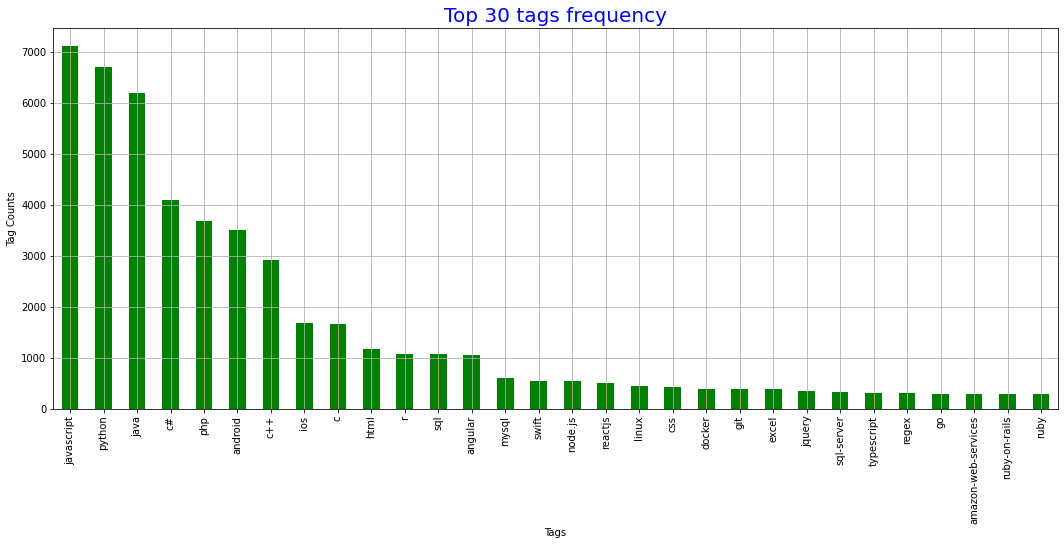

In [ ]:
plt.rcParams['figure.figsize'] = (18, 7)
coverage.plot.bar(color = 'green')
plt.title('Top 30 tags frequency', fontsize = 20, color = 'blue')
plt.xlabel('Tags')
plt.ylabel('Tag Counts')
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

## ***Title***

In [ ]:
Plot_picture(df, value='Title', title='Length of Title', xlabel='Title Length')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



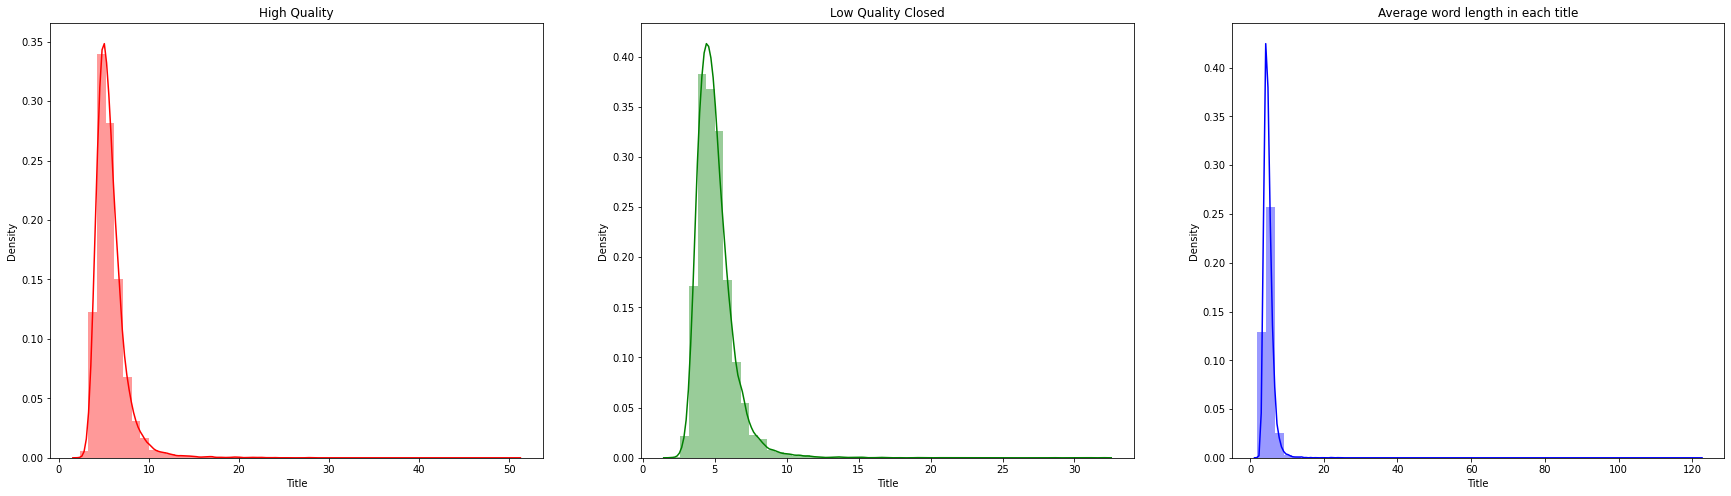

In [ ]:
Plot_3_picture(df, df_columns='Title', title='Average word length in each title')

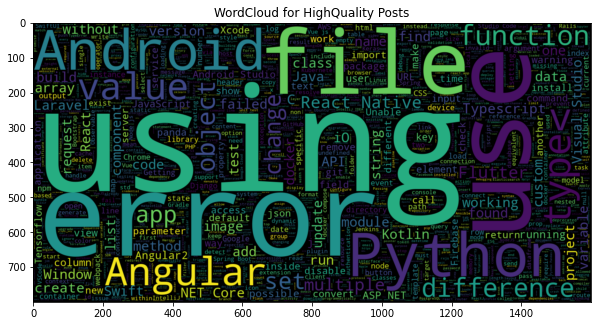

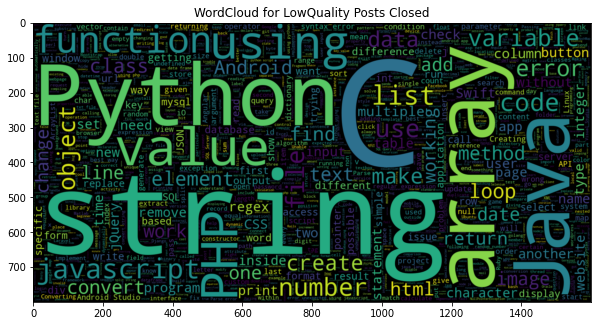

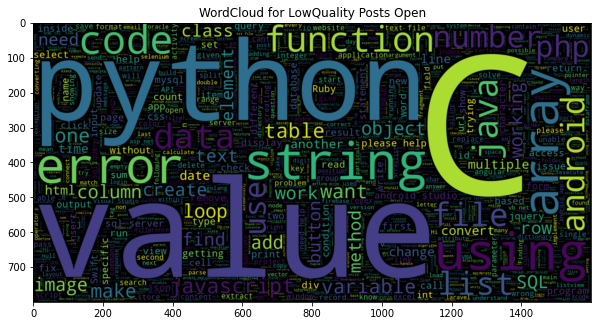

In [ ]:
wordcloud_feature(df, df_columns='Title',Y_value='HQ', title='WordCloud for HighQuality Posts')
wordcloud_feature(df, df_columns='Title',Y_value='LQ_CLOSE', title='WordCloud for LowQuality Posts Closed')
wordcloud_feature(df, df_columns='Title',Y_value='LQ_EDIT', title='WordCloud for LowQuality Posts Open')

## ***Body***

In [ ]:
Plot_picture(df, value='Body', title='Length of Body', xlabel='Body Length')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



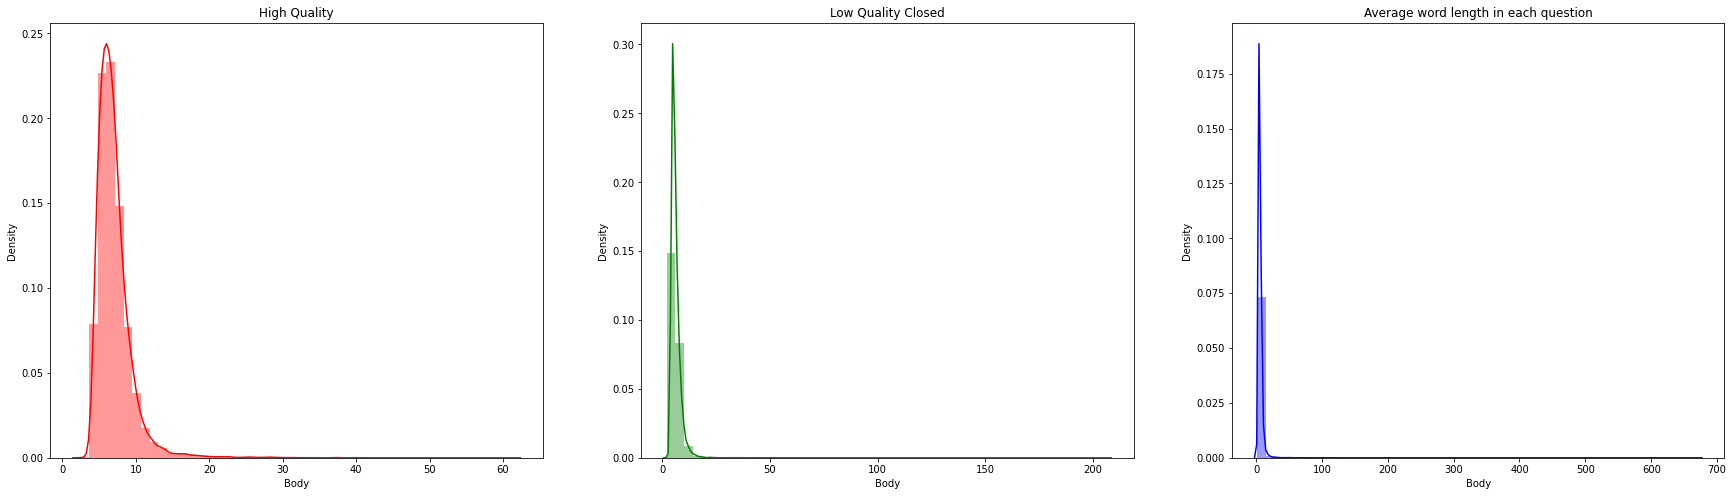

In [ ]:
Plot_3_picture(df, df_columns='Body', title='Average word length in each question')

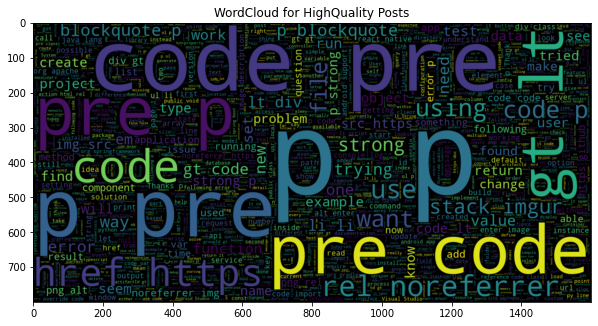

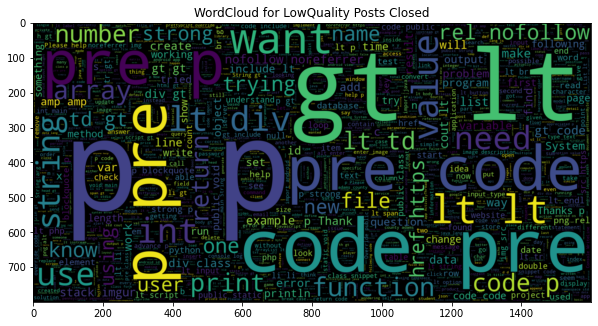

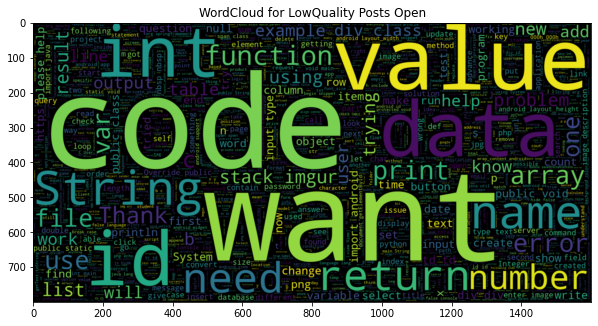

In [ ]:
wordcloud_feature(df, df_columns='Body',Y_value='HQ', title='WordCloud for HighQuality Posts')
wordcloud_feature(df, df_columns='Body',Y_value='LQ_CLOSE', title='WordCloud for LowQuality Posts Closed')
wordcloud_feature(df, df_columns='Body',Y_value='LQ_EDIT', title='WordCloud for LowQuality Posts Open')

## ***Y - Quality (Output)***

In [ ]:
df['Y'].value_counts()

LQ_CLOSE    20000
HQ          20000
LQ_EDIT     20000
Name: Y, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Label Count in Dataset')

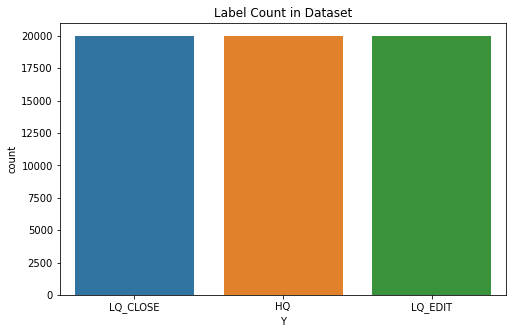

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(df.Y)
plt.title("Label Count in Dataset")

## ***EDA for Text (Input)***

### *Tỉ lệ các bài viết có độ dài dưới 500*

In [ ]:
df_ = df.copy()
df_['Text'] = df_['Title'] + " " + df_['Body']
HQ = df_[df_['Y']=='HQ']['Text'].str.split().map(lambda x: len(x) if len(x) < 500 else 500)
LQ_EDIT = df_[df_['Y']=='LQ_EDIT']['Text'].str.split().map(lambda x: len(x) if len(x) < 500 else 500)
LQ_CLOSE = df_[df_['Y']=='LQ_CLOSE']['Text'].str.split().map(lambda x: len(x) if len(x) < 500 else 500)

In [ ]:
# Plot trên cùng 1 ảnh
fig = go.Figure()
fig.add_trace(go.Histogram(x=HQ, histfunc='avg', name="HQ", opacity=0.6, histnorm='probability density'))
fig.add_trace(go.Histogram(x=LQ_EDIT, histfunc='avg', name="LQ_EDIT", opacity=0.6, histnorm='probability density'))
fig.add_trace(go.Histogram(x=LQ_CLOSE, histfunc='avg', name="LQ_CLOSE", opacity=0.6, histnorm='probability density'))

fig.update_layout(
    title_text='Question word count frequency',
    xaxis_title_text='Word count',
    yaxis_title_text='Frequency',
    bargap=0.2,
    bargroupgap=0.1,
    barmode='overlay'
)
fig.show()

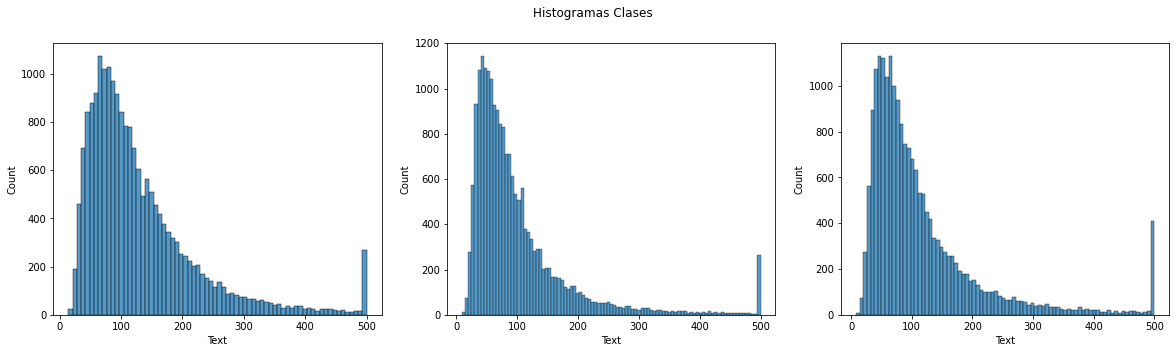

In [ ]:
# Plot riêng từng ảnh
fig, axes = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Histogramas Clases')
sns.histplot(ax=axes[0],data=HQ)
sns.histplot(ax=axes[1],data=LQ_CLOSE)
sns.histplot(ax=axes[2],data=LQ_EDIT)

### *Text*

In [ ]:
Plot_picture(df_, value='Text', title='Length of Text', xlabel='Text Length')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



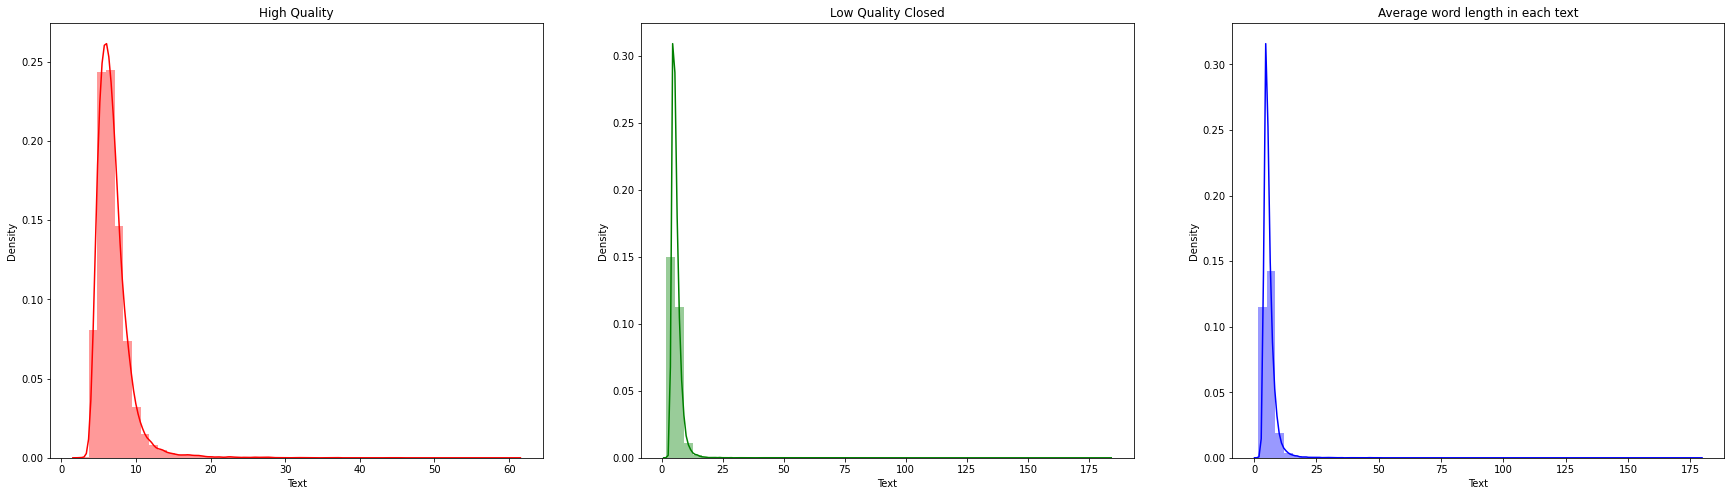

In [ ]:
Plot_3_picture(df_, df_columns='Text', title='Average word length in each text')

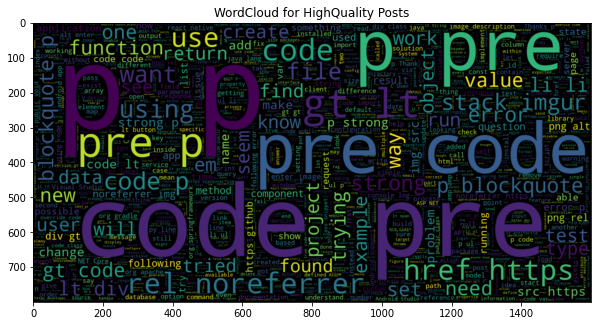

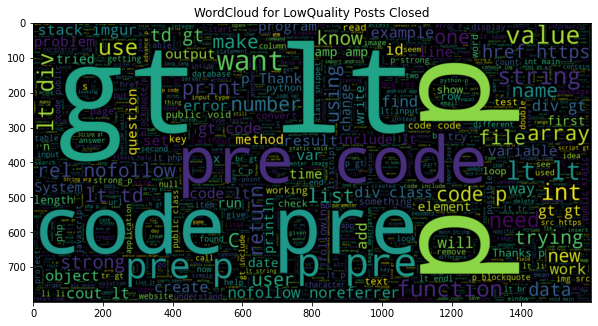

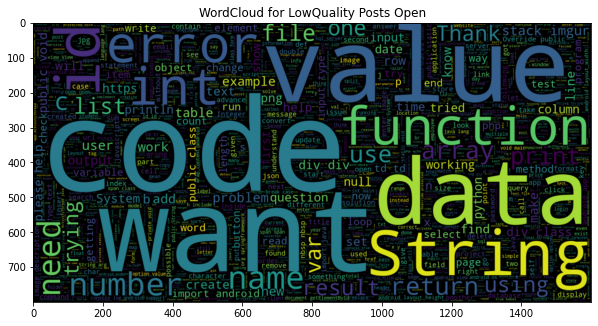

In [ ]:
wordcloud_feature(df_, df_columns='Text',Y_value='HQ', title='WordCloud for HighQuality Posts')
wordcloud_feature(df_, df_columns='Text',Y_value='LQ_CLOSE', title='WordCloud for LowQuality Posts Closed')
wordcloud_feature(df_, df_columns='Text',Y_value='LQ_EDIT', title='WordCloud for LowQuality Posts Open')

# **4. Tiền xử lý**
Gộp Title và Body thành feature 'Text'. 
Với Text được xử lý:
- Chuyển về chữ thường
- Loại bỏ các kí hiệu đặc biệt

In [ ]:
df1 = df.copy()
df1['Text'] = df1['Title'] + " " + df1['Body']
df1 = df1.drop(columns = ['Id', 'Title', 'Body', 'Tags', 'CreationDate'])

In [ ]:
labelencoder = LabelEncoder()
df1['label_encoding'] = labelencoder.fit_transform(df1['Y'])
df1 = df1.rename(columns={"Y":"label"})

In [ ]:
def clean_text(text):
  text = text.lower()
  text = re.sub(r'[^(a-zA-Z)\s]',' ', text)
  return text

In [ ]:
df1['Text'] = df1['Text'].apply(clean_text)

In [ ]:
df1.head(3) # dataset đã tiền xử lý

label                                               Text  label_encoding
0  LQ_CLOSE  java  repeat task every random seconds  p i m ...               1
1        HQ  why are java optionals immutable   p i d like ...               0
2        HQ  text overlay image with darkened opacity react...               0

# **5. Building model**

## 5.1 **Chuẩn bị data để building model**

> **Cho mô hình LSTM, Bi-LSTM**

In [ ]:
df2 = df1[['Text','label_encoding']]

X = df2['Text']
y = df2['label_encoding']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                  stratify=y, 
                                                  random_state=42, 
                                                  test_size=0.2, shuffle=True)

In [ ]:
tokenizer = text.Tokenizer(num_words=None)
max_len = 70
tokenizer.fit_on_texts(list(X_train)+list(X_test))

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = keras.utils.pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = keras.utils.pad_sequences(X_test_seq, maxlen=max_len)
word_index = tokenizer.word_index

y_train_encoding = np_utils.to_categorical(y_train)
y_test_encoding = np_utils.to_categorical(y_test)

> **Cho các mô hình học máy**

In [ ]:
df3 = df1[['Text','label']]

X_ = df3['Text']
y_ = df3['label']

X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(X_, y_, 
                                                              test_size=0.2, 
                                                              shuffle=True)

In [ ]:
tf_vectorizer = CountVectorizer()

X_train_ml = tf_vectorizer.fit_transform(X_train_ml)
X_test_ml = tf_vectorizer.transform(X_test_ml)

## 5.2 **LSTM**

In [ ]:
model_lstm = Sequential()
model_lstm.add(Embedding(len(word_index) + 1, 300, input_length=max_len, trainable=False))
model_lstm.add(SpatialDropout1D(0.3))
model_lstm.add(LSTM(100, dropout=0.3, recurrent_dropout=0.3))

model_lstm.add(Dense(1024, activation='relu'))
model_lstm.add(Dropout(0.8))

model_lstm.add(Dense(1024, activation='relu'))
model_lstm.add(Dropout(0.8))

model_lstm.add(Dense(3))
model_lstm.add(Activation('softmax'))
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 70, 300)           52883400  
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 70, 300)          0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 100)               160400    
                                                                 
 dense_3 (Dense)             (None, 1024)              103424    
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 1024)              1049600   
                                                      

In [ ]:
callbacks = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                     min_delta=0, 
                                                     patience=10, 
                                                     verbose=0, 
                                                     mode='min',
                                                     baseline=None, 
                                                     restore_best_weights=True)

In [ ]:
hist_lstm = model_lstm.fit(X_train_pad,y_train_encoding, 
                         batch_size=512, epochs=20, verbose=1, 
                         validation_data=(X_test_pad, y_test_encoding),
                         callbacks=callbacks)

Epoch 1/20
94/94 [==============================] - 43s 409ms/step - loss: 0.5650 - accuracy: 0.6590 - val_loss: 0.4481 - val_accuracy: 0.7373
Epoch 2/20
94/94 [==============================] - 35s 371ms/step - loss: 0.4268 - accuracy: 0.7698 - val_loss: 0.3838 - val_accuracy: 0.8030
Epoch 3/20
94/94 [==============================] - 57s 612ms/step - loss: 0.4086 - accuracy: 0.7884 - val_loss: 0.3738 - val_accuracy: 0.8177
Epoch 4/20
94/94 [==============================] - 52s 551ms/step - loss: 0.4016 - accuracy: 0.7951 - val_loss: 0.3658 - val_accuracy: 0.8177
Epoch 5/20
94/94 [==============================] - 36s 386ms/step - loss: 0.3999 - accuracy: 0.7965 - val_loss: 0.3772 - val_accuracy: 0.8153
Epoch 6/20
94/94 [==============================] - 29s 306ms/step - loss: 0.3956 - accuracy: 0.7980 - val_loss: 0.3629 - val_accuracy: 0.8186
Epoch 7/20
94/94 [==============================] - 48s 516ms/step - loss: 0.3964 - accuracy: 0.7967 - val_loss: 0.3721 - val_accuracy: 0.8217

In [ ]:
y_pred_lstm = model_lstm.predict(X_test_pad)
y_pred_lstm = np.argmax(y_pred_lstm, axis=1)

y_true = np.argmax(y_test_encoding, axis=1)

375/375 [==============================] - 8s 21ms/step


## 5.3 **Bi-LSTM**

In [ ]:
model_bilstm = Sequential()
model_bilstm.add(Embedding(len(word_index)+1,300,input_length=max_len,trainable=False))
model_bilstm.add(SpatialDropout1D(0.3))
model_bilstm.add(Bidirectional(LSTM(256, dropout=0.3, recurrent_dropout=0.3,return_sequences=True)))
model_bilstm.add(Dropout(0.2))
model_bilstm.add(Bidirectional(LSTM(512, dropout=0.3, recurrent_dropout=0.3)))
model_bilstm.add(Dropout(0.2))
model_bilstm.add(Dense(1024,activation='relu'))
model_bilstm.add(Dropout(0.5))
model_bilstm.add(Dense(1024, activation='relu'))
model_bilstm.add(Dropout(0.5))
model_bilstm.add(Dense(3))
model_bilstm.add(Activation('softmax'))
model_bilstm.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model_bilstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 70, 300)           52883400  
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 70, 300)          0         
 lDropout1D)                                                     
                                                                 
 bidirectional (Bidirectiona  (None, 70, 512)          1140736   
 l)                                                              
                                                                 
 dropout_4 (Dropout)         (None, 70, 512)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 1024)             4198400   
 nal)                                                            
                                                      

In [ ]:
earlystop = EarlyStopping(monitor='val_loss', 
                          min_delta=0, patience=10, verbose=0, 
                          mode='auto', restore_best_weights=True)

In [ ]:
hist_bilstm = model_bilstm.fit(X_train_pad, y=y_train_encoding, 
                           batch_size=512, epochs=20, verbose=1, 
                           validation_data=(X_test_pad, y_test_encoding), 
                           callbacks=[earlystop])

Epoch 1/20
94/94 [==============================] - 133s 1s/step - loss: 0.5114 - accuracy: 0.7175 - val_loss: 0.3990 - val_accuracy: 0.7922
Epoch 2/20
94/94 [==============================] - 122s 1s/step - loss: 0.4139 - accuracy: 0.7833 - val_loss: 0.3871 - val_accuracy: 0.7962
Epoch 3/20
94/94 [==============================] - 135s 1s/step - loss: 0.4026 - accuracy: 0.7939 - val_loss: 0.3706 - val_accuracy: 0.8169
Epoch 4/20
94/94 [==============================] - 122s 1s/step - loss: 0.3978 - accuracy: 0.7970 - val_loss: 0.3774 - val_accuracy: 0.8074
Epoch 5/20
94/94 [==============================] - 122s 1s/step - loss: 0.3938 - accuracy: 0.7980 - val_loss: 0.3707 - val_accuracy: 0.8130
Epoch 6/20
94/94 [==============================] - 122s 1s/step - loss: 0.3880 - accuracy: 0.8029 - val_loss: 0.3743 - val_accuracy: 0.8238
Epoch 7/20
94/94 [==============================] - 121s 1s/step - loss: 0.3874 - accuracy: 0.8032 - val_loss: 0.3648 - val_accuracy: 0.8193
Epoch 8/20
94

In [ ]:
# Predict for Bi-LSTM
y_pred_bilstm = model_bilstm.predict(X_test_pad)
y_pred_bilstm = np.argmax(y_pred_bilstm, axis=1)

y_true = np.argmax(y_test_encoding, axis=1)

375/375 [==============================] - 43s 112ms/step


## 5.4 **DistilBERT**

In [ ]:
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
    print('Running on TPU ', tpu.master())
except ValueError:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

Running on TPU  grpc://10.73.117.82:8470
REPLICAS:  8


### ***Chuẩn bị data (Input)***

In [ ]:
df4 = df.copy()

df4 = df4.drop(columns = ['Id', 'Tags', 'CreationDate'])

labelencoder = LabelEncoder()
df4['label'] = labelencoder.fit_transform(df4['Y'])


def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^(a-zA-Z)]',' ', text) # (a-zA-Z)\s]
    return text


df4['Title'] = df['Title'].apply(clean_text)
df4['Body'] = df['Body'].apply(clean_text)

df4 = df4.sample(frac = 1)

df4.head()

Title  \
13996        is it possible to stop a program in python    
24709  how to check overlapping of multiple number ra...   
32902   how do i update from a select in sql command c     
40257        importing a json object into mongodb   java   
14452    how to assign values to a struct type variable    

                                                    Body         Y  label  
13996   p if i had a code like this   p    pre  code ...  LQ_CLOSE      1  
24709   p i have a problem in javascript in which i n...  LQ_CLOSE      1  
32902  i need to update book table and stock table sa...   LQ_EDIT      2  
40257  while ((line   br readline())    null)        ...   LQ_EDIT      2  
14452   p so my compiler is complaining about my dest...  LQ_CLOSE      1

In [ ]:
train = df4.iloc[:55000,:]
test = df4.iloc[55000:,:]

traintext = train[['Title','Body']].values.tolist()
testtext = test[['Title','Body']].values.tolist()

In [ ]:
model_bert = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_bert)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-german-cased')

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/240k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/479k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/464 [00:00<?, ?B/s]

In [ ]:
max_len = 300
batch_size = 32 * strategy.num_replicas_in_sync

trainencoded = tokenizer.batch_encode_plus(traintext,pad_to_max_length=True,max_length=max_len)
testencoded = tokenizer.batch_encode_plus(testtext,pad_to_max_length=True,max_length=max_len)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2336: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
X_train_bert, X_val_bert, y_train_bert, y_val_bert = train_test_split(trainencoded['input_ids'],
                                                                      train['label'].values,
                                                                      test_size=0.2, random_state=42)
X_test_bert = testencoded['input_ids']

In [ ]:
auto = tf.data.experimental.AUTOTUNE
traindataset = tf.data.Dataset.from_tensor_slices((X_train_bert,y_train_bert)).repeat().shuffle(2048).batch(batch_size).prefetch(auto)
validdataset = (tf.data.Dataset.from_tensor_slices((X_val_bert, y_val_bert)).batch(batch_size).cache().prefetch(auto))
testdataset = (tf.data.Dataset.from_tensor_slices(X_test_bert).batch(batch_size))

### ***Building model***

In [ ]:
with strategy.scope():
    transformer_encoder = TFAutoModel.from_pretrained(model_bert)
    inputids = Input(shape=(max_len,),dtype=tf.int32, name="inputids")
    seqout = transformer_encoder(inputids)[0]
    # Only extract the token used for classification, which is <s>
    cls_token = seqout[:, 0, :]
    out = Dense(3,activation='softmax')(cls_token)
    model_bert = Model(inputs=inputids, outputs=out)
    model_bert.compile(Adam(lr=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model_bert.summary()

Downloading:   0%|          | 0.00/363M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_transform', 'vocab_projector', 'activation_13', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputids (InputLayer)       [(None, 300)]             0         
                                                                 
 tf_distil_bert_model (TFDis  TFBaseModelOutput(last_h  66362880 
 tilBertModel)               idden_state=(None, 300,             
                             768),                               
                              hidden_states=None, att            
                             entions=None)                       
                                                                 
 tf.__operators__.getitem (S  (None, 768)              0         
 licingOpLambda)                                                 
                                                                 
 dense (Dense)               (None, 3)                 2307      
                                                             

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
callbacks = EarlyStopping(monitor='val_loss', 
                          min_delta=0, patience=5, verbose=0, 
                          mode='auto', baseline=None, 
                          restore_best_weights=True)

nsteps = len(X_train_bert)//batch_size
n_epochs = 20

In [ ]:
hist_bert = model_bert.fit(traindataset,steps_per_epoch=nsteps,validation_data=validdataset,epochs=n_epochs,callbacks=callbacks)

Epoch 1/20
171/171 [==============================] - 113s 360ms/step - loss: 0.8237 - accuracy: 0.5936 - val_loss: 0.5553 - val_accuracy: 0.7429
Epoch 2/20
171/171 [==============================] - 51s 299ms/step - loss: 0.4308 - accuracy: 0.8048 - val_loss: 0.2563 - val_accuracy: 0.8834
Epoch 3/20
171/171 [==============================] - 51s 299ms/step - loss: 0.2520 - accuracy: 0.8865 - val_loss: 0.2314 - val_accuracy: 0.8962
Epoch 4/20
171/171 [==============================] - 51s 299ms/step - loss: 0.2263 - accuracy: 0.8992 - val_loss: 0.2144 - val_accuracy: 0.9055
Epoch 5/20
171/171 [==============================] - 51s 300ms/step - loss: 0.2069 - accuracy: 0.9104 - val_loss: 0.2085 - val_accuracy: 0.9071
Epoch 6/20
171/171 [==============================] - 51s 299ms/step - loss: 0.1948 - accuracy: 0.9172 - val_loss: 0.2030 - val_accuracy: 0.9132
Epoch 7/20
171/171 [==============================] - 51s 300ms/step - loss: 0.1814 - accuracy: 0.9225 - val_loss: 0.1991 - val_a

In [ ]:
# Predict for Bert
y_pred_bert = model_bert.predict(testdataset)
y_pred_bert = np.argmax(y_pred_bert, axis=1)

y_true = np.array(test['label'])

20/20 [==============================] - 11s 433ms/step


## 5.5 **Các mô hình học máy**

In [ ]:
def MLearning(classifiers):
  model = classifiers
  model.fit(X_train_ml, y_train_ml)
  return model

### 5.5.1 **Naive Bayes - Multinomial NB**

In [ ]:
# Building model
naive_bayes = MLearning(MultinomialNB())
# Predict
y_pred_nb = naive_bayes.predict(X_test_ml)

In [ ]:
# predict dòng đầu trong tập test
print(str(naive_bayes.predict((X_test_ml))[0])) 
# 
print(naive_bayes.predict_proba(X_test_ml)) 

LQ_EDIT
[[3.71e-37 4.69e-23 1.00e+00]
 [1.00e+00 3.38e-14 5.02e-15]
 [1.61e-07 1.00e+00 4.17e-21]
 ...
 [1.00e+00 2.39e-11 8.46e-36]
 [1.00e+00 2.14e-10 1.45e-12]
 [4.11e-10 2.08e-02 9.79e-01]]


### 5.5.2 **Logistic Regression**

In [ ]:
# Building model
lr = MLearning(LogisticRegression(C=1))
# Predict
y_pred_lr = lr.predict(X_test_ml)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# predict dòng đầu trong tập test
print(str(lr.predict((X_test_ml))[0])) 
# 
print(lr.predict_proba(X_test_ml)) 

LQ_EDIT
[[1.05e-17 2.03e-08 1.00e+00]
 [1.00e+00 1.57e-04 2.49e-04]
 [2.50e-02 9.75e-01 4.72e-15]
 ...
 [1.00e+00 4.07e-16 8.41e-28]
 [6.82e-01 3.15e-01 2.76e-03]
 [2.18e-04 7.63e-01 2.37e-01]]


### 5.5.3 **Decition Tree**

In [ ]:
# Building model
d_tree = MLearning(DecisionTreeClassifier())
# Predict
y_pred_d_tree = d_tree.predict(X_test_ml)

In [ ]:
# predict dòng đầu trong tập test
print(str(d_tree.predict((X_test_ml))[0])) 
# 
print(d_tree.predict_proba(X_test_ml)) 

LQ_EDIT
[[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### 5.5.4 **Random Forest**

In [ ]:
# Building model
rf = MLearning(RandomForestClassifier())
# Predict
y_pred_rf = rf.predict(X_test_ml)

In [ ]:
# predict dòng đầu trong tập test
print(str(rf.predict((X_test_ml))[0])) 
# 
print(rf.predict_proba(X_test_ml)) 

LQ_EDIT
[[0.27 0.29 0.44]
 [0.48 0.31 0.21]
 [0.25 0.53 0.22]
 ...
 [0.69 0.16 0.15]
 [0.5  0.28 0.22]
 [0.16 0.29 0.55]]


# **6. Evaluate model**

## ***Functions for evaluate model***

In [ ]:
def measure(y_test,y_pred):
  ''' print ra c'''
  print(classification_report(y_test, y_pred))
  print("Overall Accuracy:",accuracy_score(y_test, y_pred))
  print("Overall Precision:",precision_score(y_test, y_pred, average='macro'))
  print("Overall Recall:",recall_score(y_test, y_pred, average='macro'))

In [ ]:
def evaluate(y_test, y_pred):
  # confusion matrix
  print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
  # precision, recall, f1-score, accuracy
  measure(y_test, y_pred)

In [ ]:
def plot_confusion_matrix(cm, classes, accuracy, normalize=False, title='', cmap=plt.cm.Blues):
    if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(15,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(f'Confusion Matrix (Accuracy = {accuracy})', fontsize=35)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
              color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## ***Evaluate***

In [ ]:
class_names = ['HQ','LQ_EDIT', 'LQ_CLOSE']

Confusion Matrix : 
 [[3521  479    0]
 [1373 2626    1]
 [   0    5 3995]]
              precision    recall  f1-score   support

           0       0.72      0.88      0.79      4000
           1       0.84      0.66      0.74      4000
           2       1.00      1.00      1.00      4000

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.84     12000
weighted avg       0.85      0.85      0.84     12000

Overall Accuracy: 0.8451666666666666
Overall Precision: 0.8545250435953053
Overall Recall: 0.8451666666666666


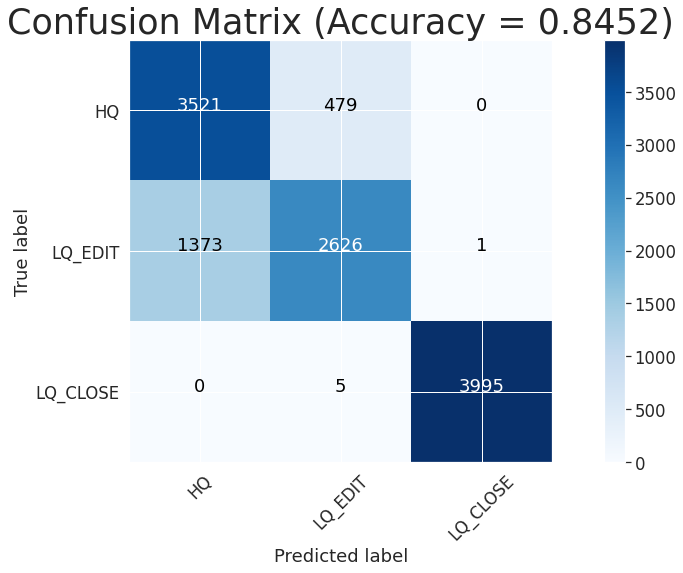

In [ ]:
# Evaluate for LSTM
evaluate(y_true, y_pred_lstm)

mcm = confusion_matrix(y_true, y_pred_lstm)
acc = accuracy_score(y_true, y_pred_lstm)
plot_confusion_matrix(mcm, class_names, round(acc, 4), normalize=False)

Confusion Matrix : 
 [[3412  588    0]
 [1213 2786    1]
 [   0    4 3996]]
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      4000
           1       0.82      0.70      0.76      4000
           2       1.00      1.00      1.00      4000

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000

Overall Accuracy: 0.8495
Overall Precision: 0.8540759713022142
Overall Recall: 0.8495


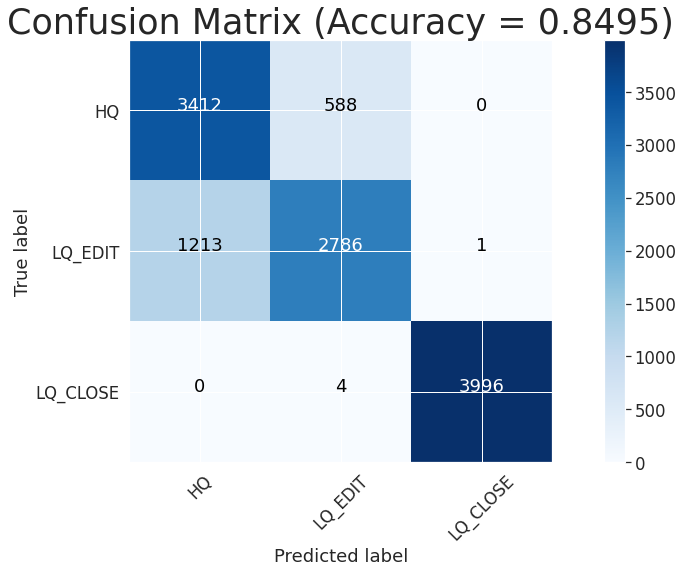

In [ ]:
# Evaluate for Bi-LSTM
evaluate(y_true, y_pred_bilstm)

mcm = confusion_matrix(y_true, y_pred_bilstm)
acc = accuracy_score(y_true, y_pred_bilstm)
plot_confusion_matrix(mcm, class_names, round(acc, 4), normalize=False)

Confusion Matrix : 
 [[1409  209    2]
 [ 210 1522    1]
 [   1    6 1640]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1620
           1       0.88      0.88      0.88      1733
           2       1.00      1.00      1.00      1647

    accuracy                           0.91      5000
   macro avg       0.91      0.91      0.91      5000
weighted avg       0.91      0.91      0.91      5000

Overall Accuracy: 0.9142
Overall Precision: 0.9147168439574317
Overall Recall: 0.9145829170439305


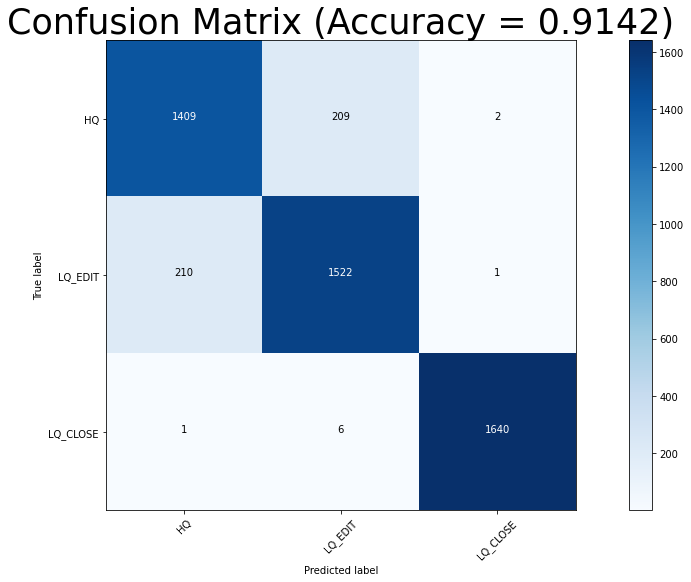

In [ ]:
# Evaluate for Bert
evaluate(y_true, y_pred_bert)

mcm = confusion_matrix(y_true, y_pred_bert)
acc = accuracy_score(y_true, y_pred_bert)
plot_confusion_matrix(mcm, class_names, round(acc, 4), normalize=False)

###naive

Confusion Matrix : 
 [[3370  527   50]
 [ 828 2813  389]
 [ 496  927 2600]]
              precision    recall  f1-score   support

          HQ       0.72      0.85      0.78      3947
    LQ_CLOSE       0.66      0.70      0.68      4030
     LQ_EDIT       0.86      0.65      0.74      4023

    accuracy                           0.73     12000
   macro avg       0.74      0.73      0.73     12000
weighted avg       0.74      0.73      0.73     12000

Overall Accuracy: 0.7319166666666667
Overall Precision: 0.7442425838059017
Overall Recall: 0.7327039262155393


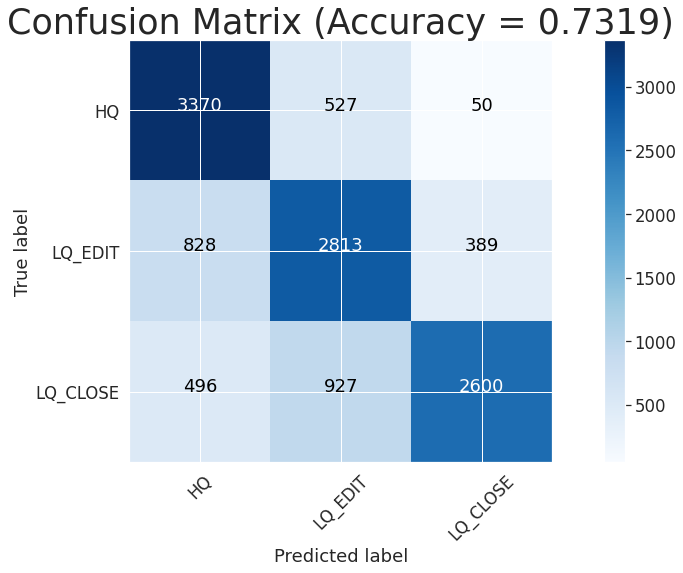

In [ ]:
# Evaluate for Naive Bayes
evaluate(y_test_ml, y_pred_nb)

mcm = confusion_matrix(y_test_ml, y_pred_nb)
acc = accuracy_score(y_test_ml, y_pred_nb)
plot_confusion_matrix(mcm, class_names, round(acc, 4), normalize=False)

Confusion Matrix : 
 [[3305  511  131]
 [ 460 3081  489]
 [ 108  430 3485]]
              precision    recall  f1-score   support

          HQ       0.85      0.84      0.85      3947
    LQ_CLOSE       0.77      0.76      0.77      4030
     LQ_EDIT       0.85      0.87      0.86      4023

    accuracy                           0.82     12000
   macro avg       0.82      0.82      0.82     12000
weighted avg       0.82      0.82      0.82     12000

Overall Accuracy: 0.8225833333333333
Overall Precision: 0.8227817120268467
Overall Recall: 0.8227099671330977


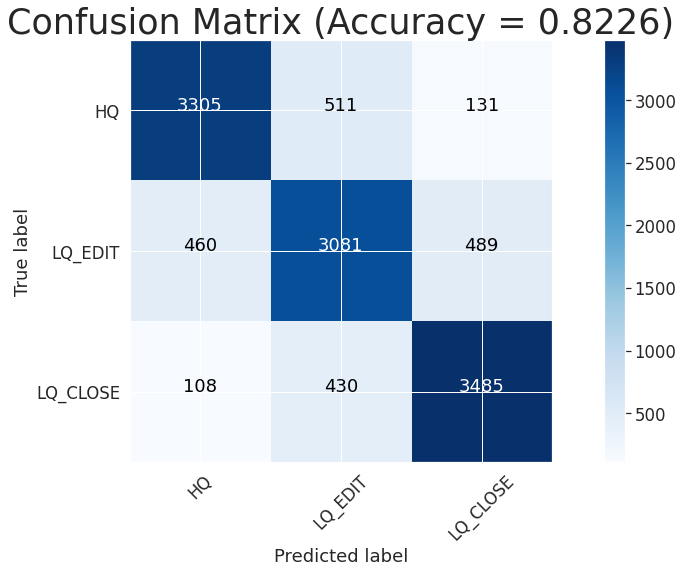

In [ ]:
# Evaluate for Logistic Regression
evaluate(y_test_ml, y_pred_lr)

mcm = confusion_matrix(y_test_ml, y_pred_lr)
acc = accuracy_score(y_test_ml, y_pred_lr)
plot_confusion_matrix(mcm, class_names, round(acc, 4), normalize=False)

Confusion Matrix : 
 [[2900  837  210]
 [ 818 2633  579]
 [ 174  538 3311]]
              precision    recall  f1-score   support

          HQ       0.75      0.73      0.74      3947
    LQ_CLOSE       0.66      0.65      0.66      4030
     LQ_EDIT       0.81      0.82      0.82      4023

    accuracy                           0.74     12000
   macro avg       0.74      0.74      0.74     12000
weighted avg       0.74      0.74      0.74     12000

Overall Accuracy: 0.737
Overall Precision: 0.7365384315052079
Overall Recall: 0.737034255469147


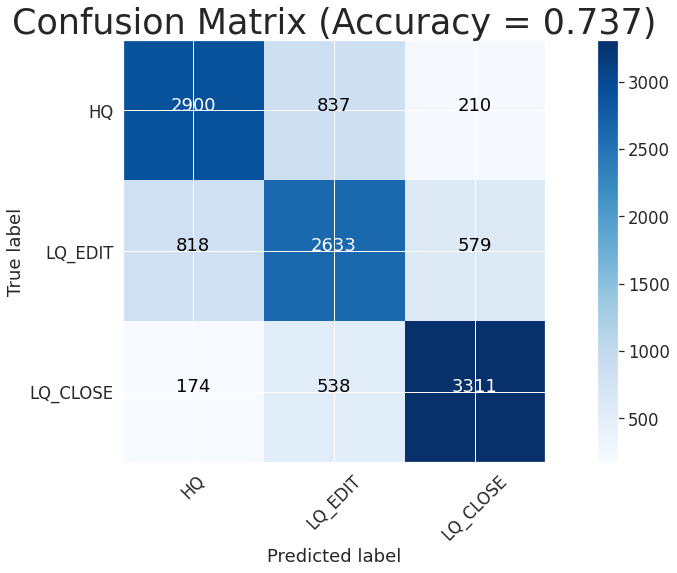

In [ ]:
# Evaluate for Decision Tree
evaluate(y_test_ml, y_pred_d_tree)

mcm = confusion_matrix(y_test_ml, y_pred_d_tree)
acc = accuracy_score(y_test_ml, y_pred_d_tree)
plot_confusion_matrix(mcm, class_names, round(acc, 4), normalize=False)

Confusion Matrix : 
 [[3083  742  122]
 [ 500 3028  502]
 [ 206  490 3327]]
              precision    recall  f1-score   support

          HQ       0.81      0.78      0.80      3947
    LQ_CLOSE       0.71      0.75      0.73      4030
     LQ_EDIT       0.84      0.83      0.83      4023

    accuracy                           0.79     12000
   macro avg       0.79      0.79      0.79     12000
weighted avg       0.79      0.79      0.79     12000

Overall Accuracy: 0.7865
Overall Precision: 0.7888448584428032
Overall Recall: 0.7864863711920128


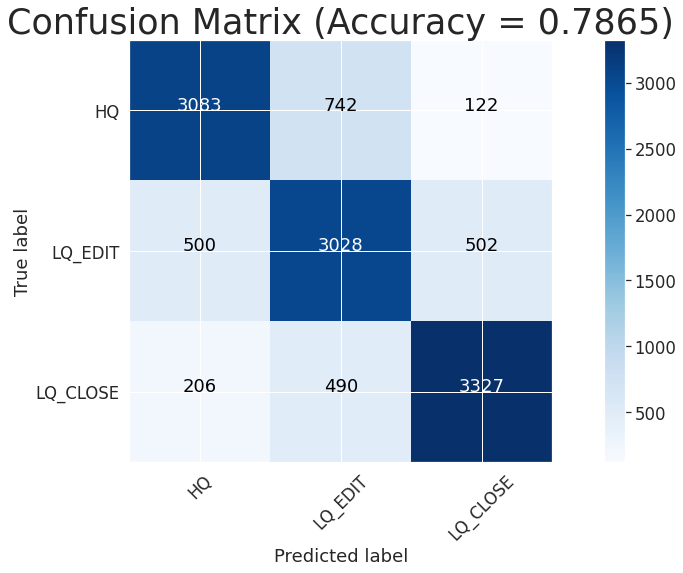

In [ ]:
# Evaluate for Random Forest
evaluate(y_test_ml, y_pred_rf)

mcm = confusion_matrix(y_test_ml, y_pred_rf)
acc = accuracy_score(y_test_ml, y_pred_rf)
plot_confusion_matrix(mcm, class_names, round(acc, 4), normalize=False)